# NASSP Observational Cosmology Machine Learning Tutorial

## "Your names here"

First make sure the cell below executes without any errors. You should be running python 3. If you're not used to jupyter notebooks, have a look here https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook#gs.Dew0mVc

You need to write all your code here in this notebook and submit it as part of your solutions. Answer all the questions and copy the plots you make (with captions) into your solution pdf that you'll submit.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sncosmo
from astropy.table import Table

# Section 1: Setup

### How to read in a supernova light curve as an astropy table

I've saved the supernova light curves in a format that `sncosmo` can read: an astropy table. The cell below reads in a single object's data and displays the table. 

The columns are: <br>
`mjd`: Time in days since the first observation of the supernova <br>
`filter`: Which filter band the observation is in (i.e. which colour)<br>
`flux`: The flux (brightness) in that band<br>
`flux_error`: Uncertainty on the flux due to instrumental noise<br>
`zp`: What magnitude the flux is calibrated to (don't worry too much about this)<br>
`zpsys`: The system used to calibrate the flux (also don't worry)

In [3]:
lc_file = 'training_data/34.dat'
lc = Table.read(lc_file, format='ascii')
lc

mjd,filter,flux,flux_error,zp,zpsys
float64,str4,float64,float64,float64,str2
0.0,desg,95.18,5.147,27.5,ab
0.00800000000163,desr,116.1,3.062,27.5,ab
0.0239999999976,desi,102.8,3.7,27.5,ab
0.0469999999987,desz,103.7,3.153,27.5,ab
2.997,desg,174.7,4.272,27.5,ab
3.004,desr,176.1,3.73,27.5,ab
3.043,desi,165.5,3.691,27.5,ab
3.075,desz,150.9,4.676,27.5,ab
4.075,desg,192.3,4.531,27.5,ab


# Section 2: Feature Extraction

## <font color='red'> Question 1a: Briefly describe how sncosmo's fit_lc function works.</font>
## <font color='red'> Question 1b: Briefly describe what each of the 5 parameters in the SALT2 model is.</font>

### Use `sncosmo` to fit the SALT2 model to this light curve

In [4]:
def fit_supernova(lc):
    bnds = {'z':(0.01, 1.5), 't0':(-100,100),'x0':(-1e-3, 1e-3), 'x1':(-3, 3), 'c':(-0.5, 0.5)}
    mod = sncosmo.Model('salt2-extended')
    res = sncosmo.fit_lc(lc, mod, vparam_names=mod.param_names, bounds=bnds, minsnr=0)
    return res[0].parameters

In [5]:
prms = fit_supernova(lc)
print('Best fitting SALT2 parameters: [z, t0, x0, x1, c]:')
print(prms)

Best fitting SALT2 parameters: [z, t0, x0, x1, c]:
[  3.28980013e-01   1.48530941e+01   4.22480594e-05   6.44622949e-01
  -7.44724014e-02]


### Check that the fitting worked correctly by using sncosmo's plot_lc function 

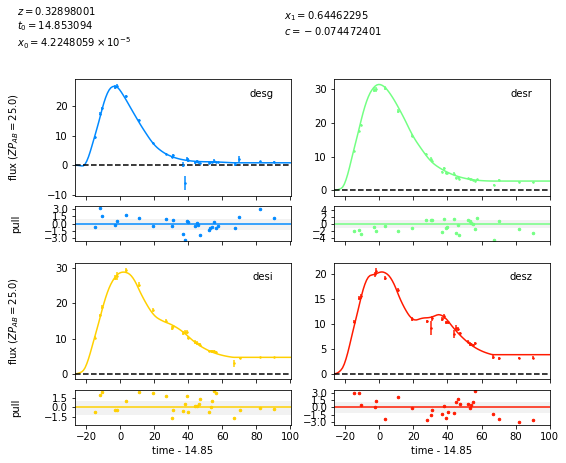

In [8]:
mod = sncosmo.Model('salt2-extended')
mod.parameters = prms
sncosmo.plot_lc(lc, mod)

## Now fit all 1000 light curves in the training data and save the parameters to file

These will be our features for the machine learning. Your final array should have dimensions [1000, 5] because there are 5 features (the SALT2 parameters). 

**NB** This will take around 30 minutes at least (unless you know how to parallelise it) so run this before the tutorial session and save these features to disk.

## <font color='red'> Question 2: Run plot_lc and make plots for data files 3, 4 and 5. Why do some of these fit badly? 

## <font color='red'> Question 3: Plot histograms for the x1 and c parameters, colouring the Ia's and the non-Ia's different colours. Do you notice any differences between the two types?

# Section 3: Machine Learning with Scikit-Learn

You need to run 3 machine learning algorithms on your set of SALT2 features, at least ONE of which must NOT have been covered in the class (i.e. you may use a maximum of two of: k-nearest neighbours, neural networks and ensemble methods with decision trees)

Remember to divide up your labeled data into a training and a validation set so that you can evaluate your algorithms. 

## <font color='red'>Question 4: For each of the three algorithms you are using, answer the following:
1. Does the algorithm you're using require the features to be rescaled (http://scikit-learn.org/stable/modules/preprocessing.html )? If so, what did you use to rescale them?
2. What values of the hyperparameters of the algorithm did you use? How did you select them (consider investigating scikit-learn's `GridSearchCV` function)?
3. How much data are you using to evaluate the algorithms?

# Section 4: Evaluating the Classification

For this section you'll need the `roc_curve` and `predict_proba` functions from sklearn.

## <font color='red'> Question 5: On one figure, plot the ROC curve for each of your classifiers and include the name of the classifier and the calculated AUC in the legend.

# Section 5: Test Data Analysis

First, repeat the above procedure to extract features from the test data. Remember to save your features to disk so you don't have to rerun it!

Next, use your best _trained classifier_ to predict the probabilities of the test objects (use `predict_proba` function of your classifier). Save these to a text file, that will look like this:<br>

`#ID    prob(Ia)    prob(II)    prob(Ibc)` <br>
`1000   0.87        0.03        0.1 `    <br>
`1001   0.25        0.04        0.79  `  <br>
`...`